In [3]:
N = 100000
BINS = 300

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Exercise 1
Sample from truncated notmal `[-0.8, 0.8]`

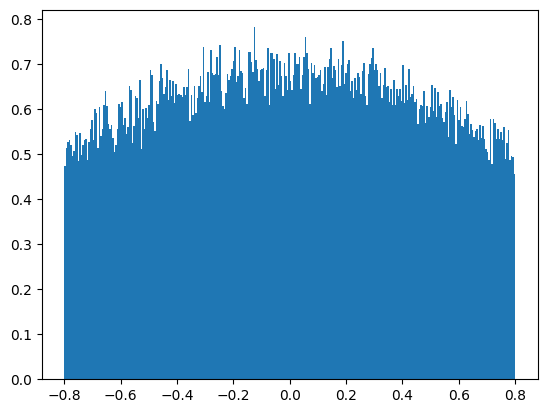

In [9]:
# We just reject the samples out of bounds
def truncated_gaussian(a, b, N, mean=0, std=1):
    trun = []
    while len(trun) < N:
        x = np.random.normal(mean, std)
        if a < x < b:
            trun.append(x)
    return np.array(trun)

a1 = -0.8
b1 = 0.8
trun = truncated_gaussian(a1, b1, N)

plt.hist(trun, bins=BINS, density=True);

### Exercise 2
Simulate data from a non-linear model

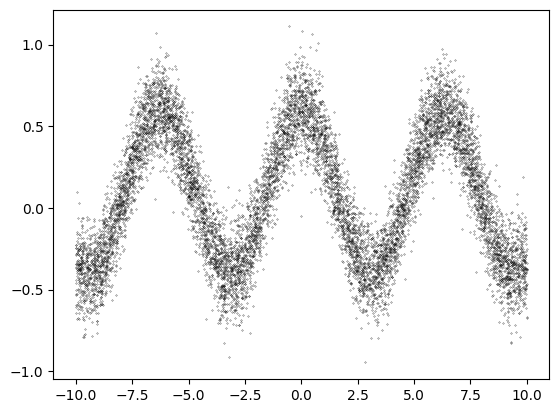

In [5]:
import numpy as np
import matplotlib .pyplot as plt

n = 10000

x = np.random.uniform(-10 , 10 , n)

a = 0.5
b = 0.1
sigma_0 = 0.15 # this is the standard deviation , not the variance!

y = a * np.cos(x) + b + sigma_0 * np.random.normal(0, 1, n)

plt.scatter(x, y, color='k', alpha=1, s=0.05)
plt.show ()


### Exercise 3
Use Box-Muller transform to sample from Gaussians

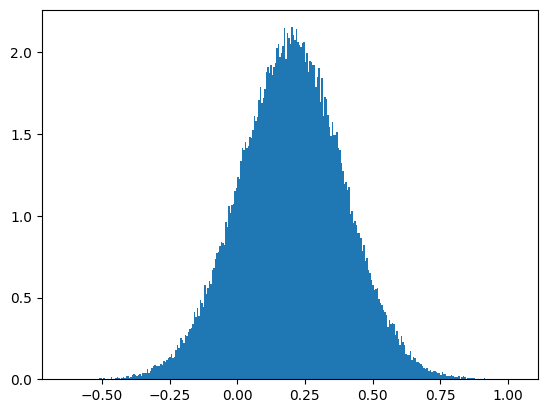

In [10]:
def box_muller(n, mean=0, std=1):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z1 = r * np.cos(theta)
    return z1 * std + mean

# Weighted sum of gaussians
weights = [0.1, 0.2, 0.3, 0.2, 0.2]
means = [-2, -1, 0, 1, 2]
stds = [0.5, 0.1, 0.5, 0.2, 0.5]

weighted_gaussians = np.sum([w * box_muller(N, m, s) for w, m, s in zip(weights, means, stds)], axis=0)
plt.hist(weighted_gaussians, bins=BINS, density=True);

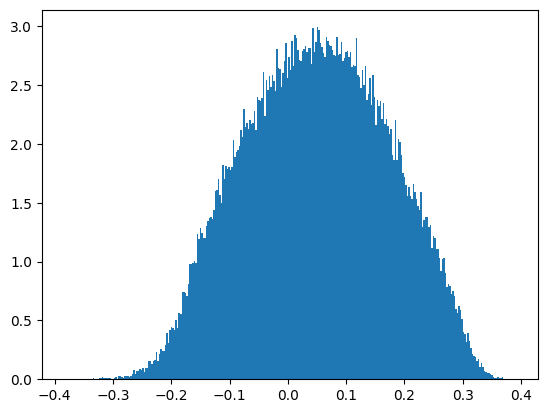

In [15]:
# Truncated box-muller gaussian
def truncated_box_muller(a, b, N, mean=0, std=1):
    trun = []
    batch = N // 5
    while len(trun) < N:
        x = box_muller(batch, mean, std)
        trun.extend(x[(a < x) & (x < b)])
    return np.array(trun[:N])

weighted_truncated_gaussians = np.sum([w * truncated_box_muller(a1, b1, N, m, s) for w, m, s in zip(weights, means, stds)], axis=0)
plt.hist(weighted_truncated_gaussians, bins=BINS, density=True);